In [1]:
import numpy as np
import cv2
import PIL
import matplotlib.pyplot as plt
import glob
import math
import pickle
%matplotlib inline

In [2]:
import matplotlib
matplotlib.__version__

'2.0.0'

In [3]:
cv2.__version__

'3.1.0'

In [ ]:
#img 604 -> 605 might be a better transition to study

In [3]:
test_img = cv2.imread("C:/Car-ND-Projects/CarND-Advanced-Lane-Lines/harder_challenge/912.jpg")

In [4]:
def imshow1(img,cmap=None):
    temp_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if cmap=='gray':
        temp_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    fig = plt.figure(figsize=(11,15))
    ax = fig.add_subplot(111)
    ax.imshow(temp_img,cmap=cmap)
    plt.show()
    

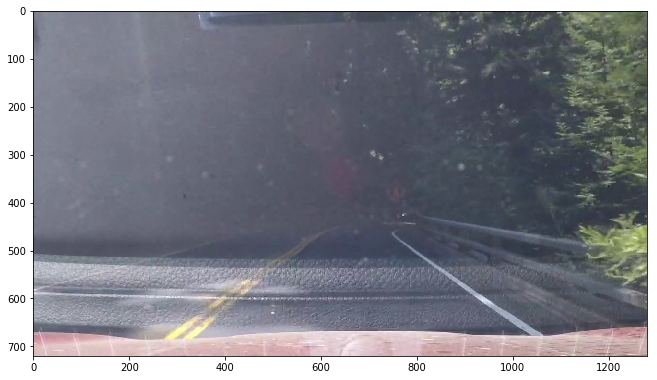

In [52]:
imshow1(test_img)

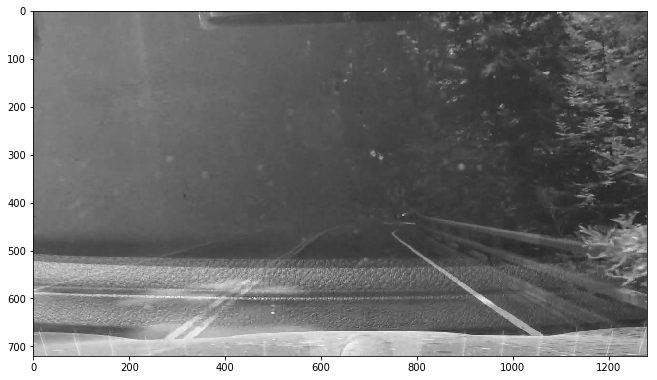

In [27]:
imshow1(test_img,cmap='gray')
#cv2.imwrite("/Car-ND-Projects/CarND-Advanced-Lane-Lines/test_gray.jpg",test_img_gray)

In [153]:
testimgsnip = test_img[500:665,:,:]

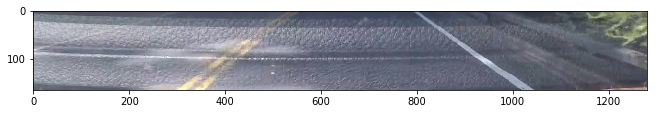

In [154]:
imshow1(testimgsnip)

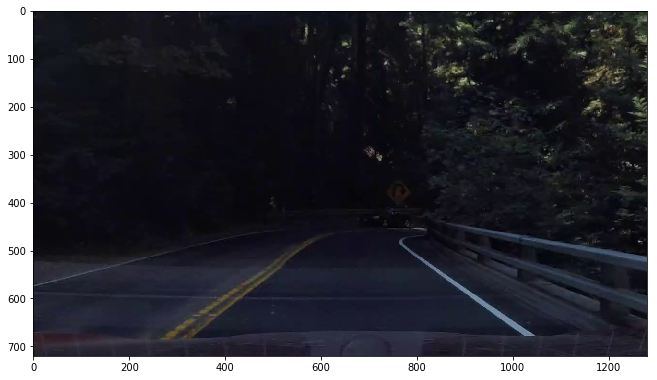

In [79]:
test_img2 = cv2.imread("C:/Car-ND-Projects/CarND-Advanced-Lane-Lines/harder_challenge/922.jpg")
imshow1(test_img2)

In [155]:
testimgsnip2 = test_img2[500:665,:,:]

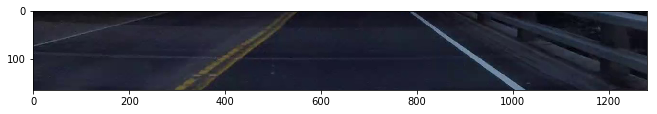

In [156]:
imshow1(testimgsnip2)

HSV

In [157]:
testhsvdiff = cv2.cvtColor(testimgsnip,cv2.COLOR_BGR2HSV)-\
                cv2.cvtColor(testimgsnip2,cv2.COLOR_BGR2HSV)

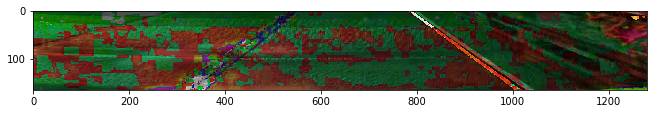

In [158]:
imshow1(cv2.cvtColor(testhsvdiff,cv2.COLOR_HSV2BGR))

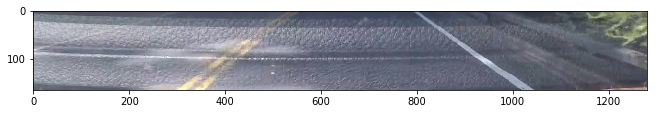

In [159]:
imshow1(testimgsnip)

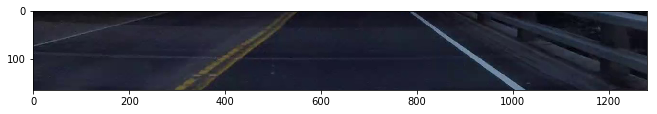

In [160]:
imshow1( cv2.cvtColor( cv2.cvtColor(testimgsnip,cv2.COLOR_BGR2HSV) - testhsvdiff,cv2.COLOR_HSV2BGR))

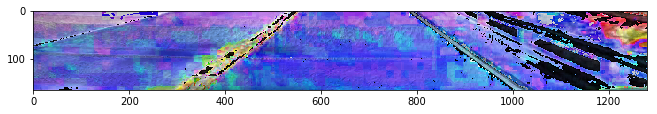

In [161]:
imshow1( cv2.cvtColor( cv2.cvtColor(testimgsnip2,cv2.COLOR_BGR2HSV) - testhsvdiff,cv2.COLOR_HSV2BGR))

In [5]:
print(cv2.cvtColor(test_img[530:535,490:495,:],cv2.COLOR_BGR2HSV) )

[[[109  15 134]
  [109  16 129]
  [109  16 126]
  [109  16 126]
  [111  20 129]]

 [[111  19 137]
  [111  19 131]
  [111  20 126]
  [106  22 125]
  [106  22 126]]

 [[111  18 138]
  [111  19 131]
  [111  20 125]
  [106  23 123]
  [106  23 123]]

 [[111  18 140]
  [111  19 132]
  [111  21 124]
  [111  21 121]
  [106  24 119]]

 [[120  14 142]
  [120  15 133]
  [111  21 123]
  [111  22 117]
  [109  18 114]]]


In [123]:
#print(cv2.cvtColor(smallsamp,cv2.COLOR_BGR2HSV))

# hsv  pixel value of [115,132,31] for almost black

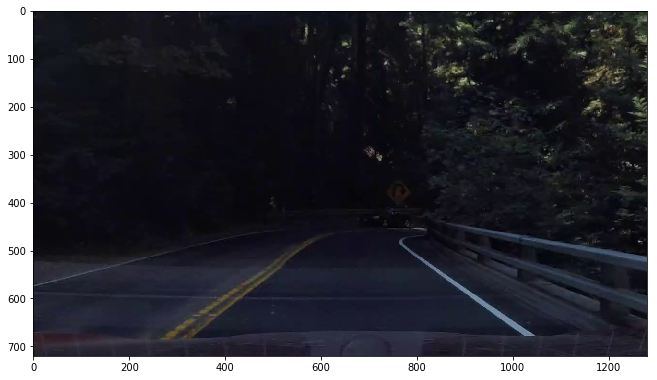

In [131]:
imshow1(test_img2)

In [177]:
test_img2[479,765,:]

array([76, 62, 64], dtype=uint8)

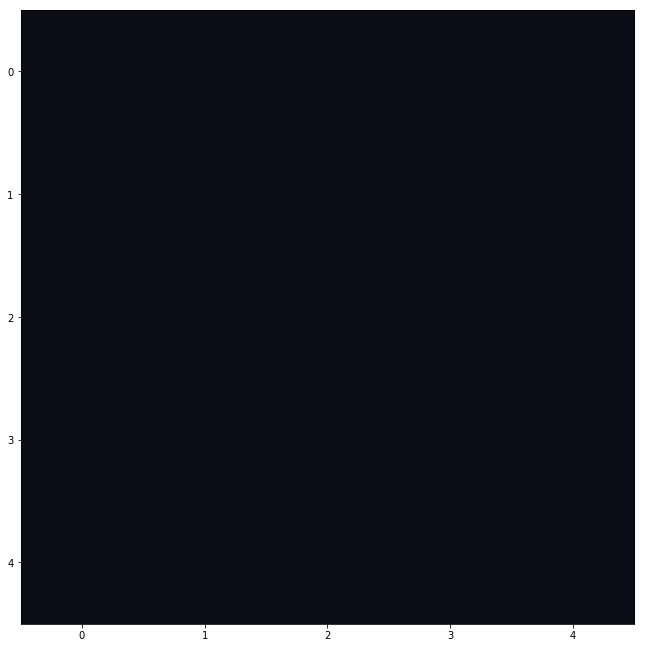

In [11]:
yellowsamp = np.uint8(np.zeros((5,5,3)))
yellowsamp[:,:,0] = 21
yellowsamp[:,:,1] = 13 
yellowsamp[:,:,2] = 10 
imshow1(yellowsamp)

In [179]:
print(cv2.cvtColor(np.reshape(np.array([60,60,60],dtype=np.uint8),(1,1,3)),cv2.COLOR_BGR2HSV))

[[[ 0  0 60]]]


In [10]:
print(cv2.cvtColor(np.reshape(np.array([113,128,21],dtype=np.uint8),(1,1,3)),cv2.COLOR_HSV2BGR))

[[[21 13 10]]]


* yellow lane line HSV 30,128,80 - 30,255,255
* white lane line HSV 0,0,60 - 0,0,255
* "Black" pavement is around 113,128-146,21
* Dash reflection on black road 119,29-41,136-194 
* Dash reflection more grey 111,20,120
* HSV for reflection range 111-120,19-42,119-200
* If image in S 19-42 and V in range 119-200 then, S add 60, V sub 115 

-----------------------------------------------------------------------------------------
-----------------------------------------------------------------------------------------

### Camera Calibration

In [48]:
imgpaths = glob.glob('../CarND-Advanced-Lane-Lines/camera_cal/calibration*.jpg')

imgsrgb = []
imgsbgr = []
for imgpath in imgpaths:
    imgsrgb.append(cv2.cvtColor(cv2.imread(imgpath),cv2.COLOR_BGR2RGB))
    imgsbgr.append(cv2.imread(imgpath))

In [80]:
objpts = [] # real world chess board coordinate x,y,z
imgpts = [] # pixel locations of chess board corners
failed = []

for img in imgsbgr:
    #convert image to grayscale
    gray =  cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    
    rows = 6
    cols = 9
    
    while True:
        ret, corners = cv2.findChessboardCorners(gray, (cols,rows), None)
    
        if ret:
            objp = np.zeros((rows*cols,3),np.float32)
            objp[:,:2] = np.mgrid[0:cols,0:rows].T.reshape(-1,2)
            
            imgpts.append(corners)
            objpts.append(objp)
            break
        else:
            if rows == 3:
                failed.append(img)
                break
            rows -= 1

In [81]:
# 18/20 images passed 
len(imgpts)

18

In [102]:
len(objpts)

18

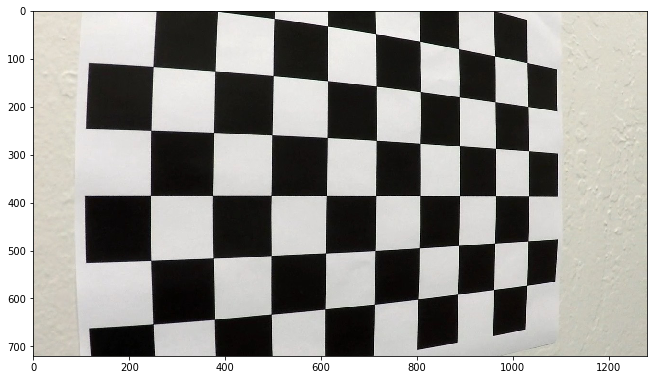

In [106]:
# Failed because not all corners were found
imshow1(failed[1])

In [107]:
imgsize = (failed[0].shape[1],failed[0].shape[0])
# Calibrate camera based on 20 images
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpts,imgpts,imgsize,None,None)

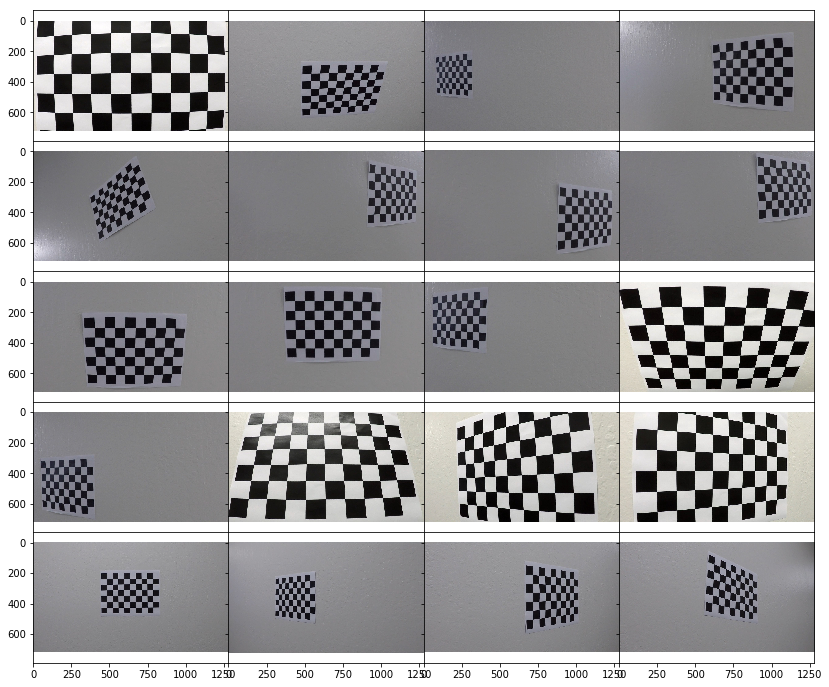

In [113]:
# before undistort
fig, axmx = plt.subplots(5, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(14,12)

for i in range(len(imgs)):
    y = math.floor(i/4)
    x = i%4
    axmx[y,x].imshow(imgsrgb[i])

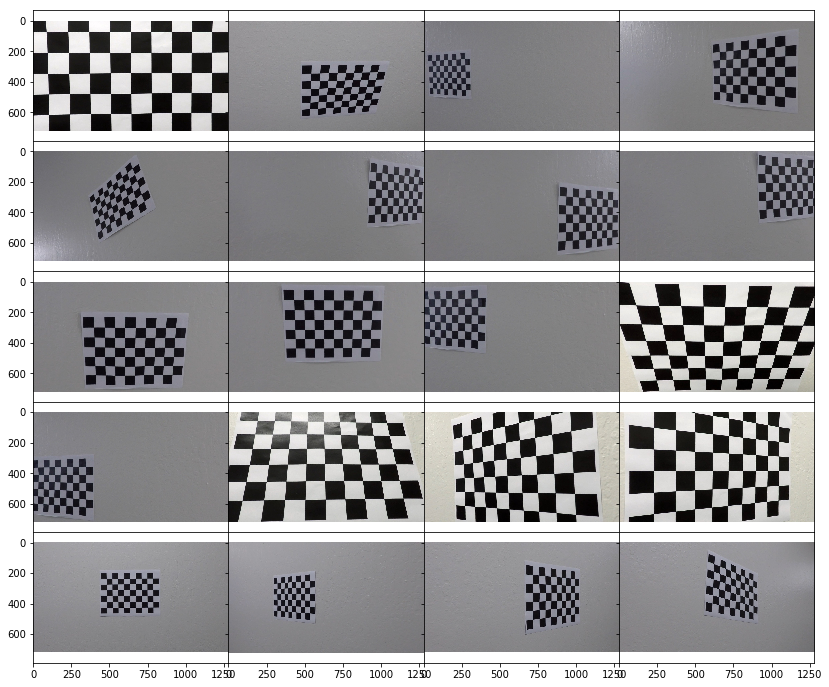

In [114]:
# test undistort
fig, axmx = plt.subplots(5, 4, sharex=True, sharey=True)
fig.subplots_adjust(hspace=0,wspace=0)
fig.set_size_inches(14,12)

for i in range(len(imgs)):
    y = math.floor(i/4)
    x = i%4
    undistortimg = cv2.undistort(imgsrgb[i],mtx,dist,None,None)
    axmx[y,x].imshow(undistortimg)

In [141]:
# save camera calibration as pickle
pickle.dump({'objpts':objpts,'imgpts':imgpts,'mtx':mtx,'dist':dist},\
            open("camera_calibration.p", "wb"))

In [5]:
def undistort(img,mtx,dist):
    return cv2.undistort(img,mtx,dist,None,mtx)

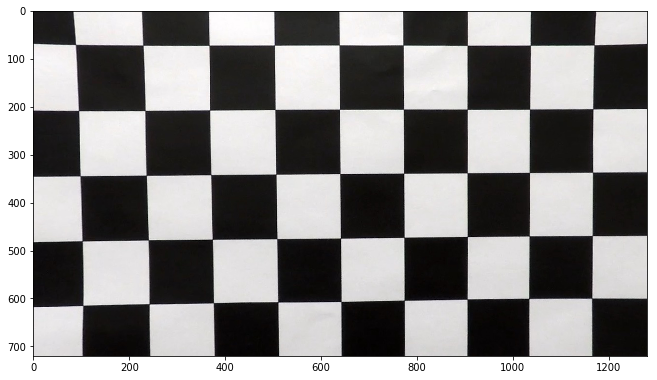

In [148]:
imshow1(undistort(imgsbgr[0],mtx,dist))

In [149]:
# undistort test image before selecting points for transforming perspective
test_img_straight1 = cv2.imread('./test_images/straight_lines1.jpg')

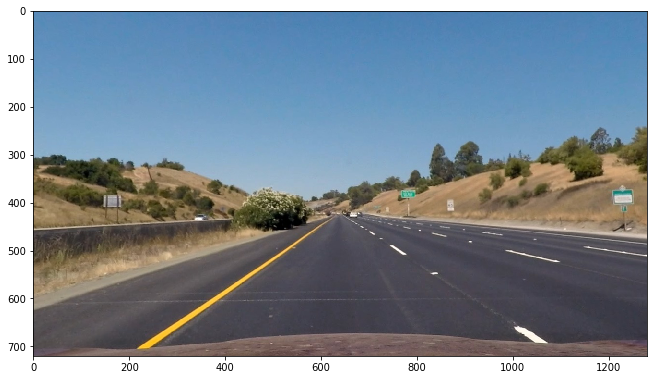

In [151]:
imshow1(undistort(test_img_straight1,mtx,dist))

In [339]:
test_img_straight2 = cv2.imread('./test_images/straight_lines2.jpg')

In [341]:
hsvt1 = cv2.cvtColor(test_img_straight1,cv2.COLOR_BGR2HSV)

In [365]:
schan = hsvt1[:,:,1]
vchan = hsvt1[:,:,2]

In [391]:
s_thresh_min = 60
s_thresh_max = 255
s_binary = np.zeros_like(vchan)
s_binary[(schan >= s_thresh_min) & (schan <= s_thresh_max)] = 1

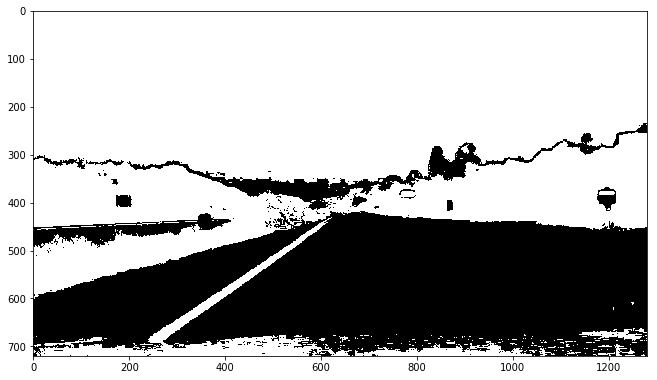

In [392]:
fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111)
ax.imshow(s_binary,cmap='gray')
plt.show()

In [398]:
v_thresh_min = 140
v_thresh_max = 255
v_binary = np.zeros_like(vchan)
v_binary[(vchan >= v_thresh_min) & (vchan <= v_thresh_max)] = 1

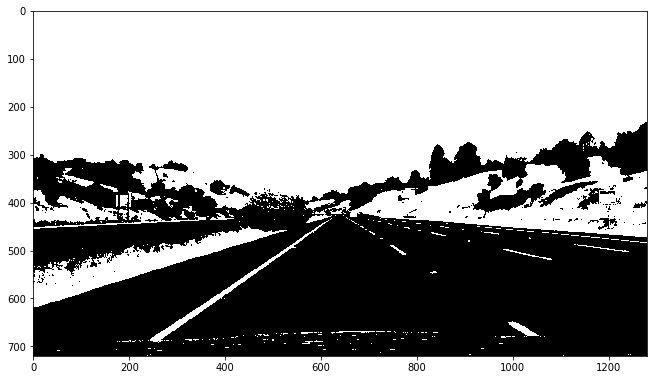

In [399]:
fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111)
ax.imshow(v_binary,cmap='gray')
plt.show()

In [403]:
grayt1 = cv2.cvtColor(test_img_straight1,cv2.COLOR_BGR2GRAY)
sobelx = cv2.Sobel(grayt1, cv2.CV_64F, 1, 0) # Take the derivative in x
abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

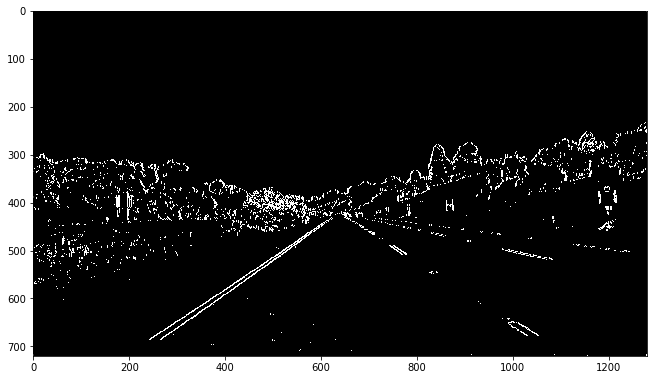

In [419]:
thresh_min = 30
thresh_max = 190
sxbinary = np.zeros_like(scaled_sobel)
sxbinary[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111)
ax.imshow(sxbinary,cmap='gray')
plt.show()

In [6]:
# This is called after camera undistort
# assume bgr image
def hsv_lines(img,sthresh=[60,255],vthresh=[140,255],xthresh=[30,190]):
    hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)

    S = hsv[:,:,1]
    V = hsv[:,:,2]
    
    # Binary map for S channel
    s_bin = np.zeros_like(S)
    s_bin[(S >= sthresh[0]) & (S <= sthresh[1])] = 1
    
    # Binary map for V channel
    v_bin = np.zeros_like(V)
    v_bin[(V >= vthresh[0]) & (V <= vthresh[1])] = 1
    
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0) # Take the derivative in x
    # Absolute x derivative to accentuate lines away from horizontal
    abs_sobelx = np.absolute(sobelx) 
    scaled_sobel = np.uint8(255*abs_sobelx/np.max(abs_sobelx))

    # Binary map for sobel x
    sx_bin = np.zeros_like(scaled_sobel)
    sx_bin[(scaled_sobel >= xthresh[0]) & (scaled_sobel <= xthresh[1])] = 1
    
    # Combine Binary Channels
    binary = np.zeros_like(S)
    binary[(s_bin == 1) | (v_bin == 1) | (sx_bin == 1)] = 1
    return binary

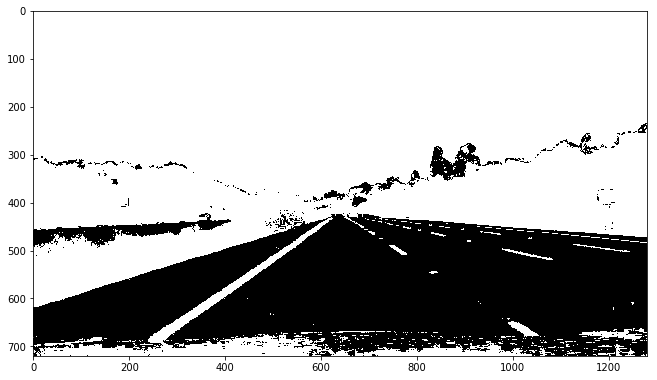

In [455]:
fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111)
ax.imshow(hsv_lines(test_img_straight1),cmap='gray')
plt.show()

In [7]:
'''
#left line       
src0 = [603,443] 
src1 = [193,719] #bottom left

#right line
src2 = [1117,719] #bottom right
src3 = [675,443]

src = np.float32([src0,src1,src2,src3])

#left line
dst0 = [320,0] 
dst1 = [320,719] #bottom left

#right line
dst2 = [960,719] #bottom right
dst3 = [960,0]
'''

#left line       
src0 = [581,457] 
src1 = [190,719] #bottom left

#right line
src2 = [1118,719] #bottom right
src3 = [700,457]

src = np.float32([src0,src1,src2,src3])

#left line
dst0 = [320,0] 
dst1 = [320,719] #bottom left

#right line
dst2 = [960,719] #bottom right
dst3 = [960,0]

dst = np.float32([dst0,dst1,dst2,dst3])

In [763]:
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst,src)

In [764]:
warped = cv2.warpPerspective(undistort(test_img_straight1,mtx,dist), \
                             M, (img_size[1],img_size[0]), flags=cv2.INTER_LINEAR)

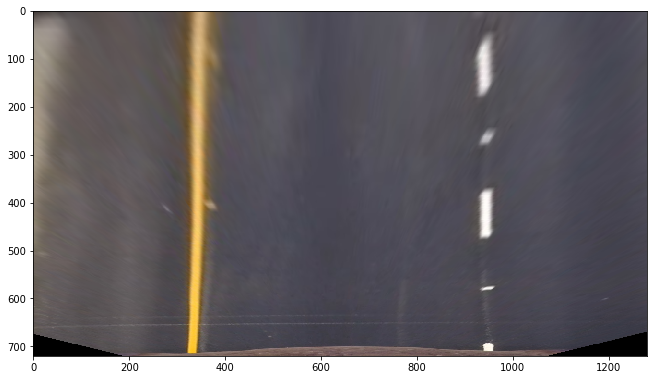

In [765]:
imshow1(warped)

In [766]:
test_img_straight2 = cv2.imread('./test_images/straight_lines2.jpg')

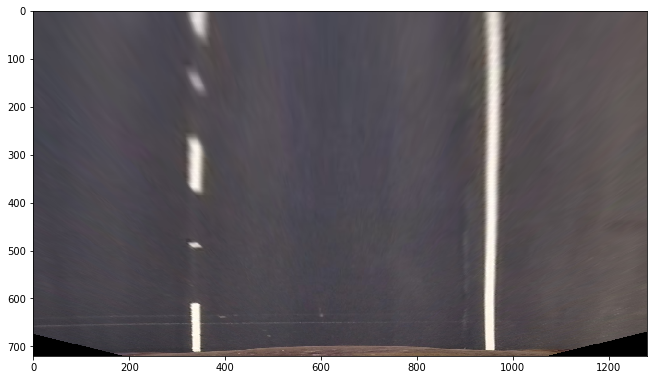

In [767]:
warped2 = cv2.warpPerspective(undistort(test_img_straight2,mtx,dist), \
                             M, (img_size[1],img_size[0]), flags=cv2.INTER_LINEAR)
imshow1(warped2)

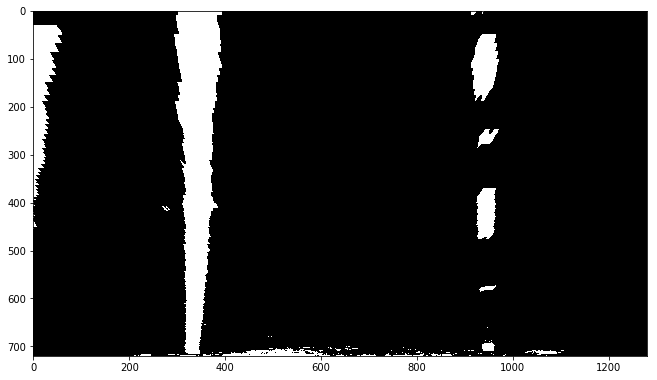

In [769]:
warpedbin = cv2.warpPerspective(hsv_lines(undistort(test_img_straight1,mtx,dist)), \
                             M, (img_size[1],img_size[0]), flags=cv2.INTER_LINEAR)

fig = plt.figure(figsize=(11,15))
ax = fig.add_subplot(111)
ax.imshow(warpedbin,cmap='gray')
plt.show()

C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in greater


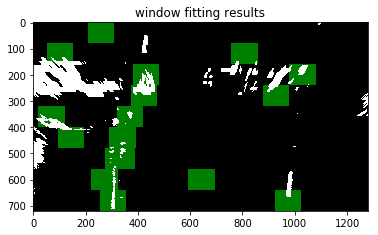

In [141]:
# window settings
window_width = 200 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 20 # How much to slide left and right for searching

def window_mask(width, height, img_ref, center,level):
    output = np.zeros_like(img_ref)
    output[int(img_ref.shape[0]-(level+1)*height):int(img_ref.shape[0]-level*height),\
           max(0,int(center-width/2)):min(int(center+width/2),img_ref.shape[1])] = 1
    return output

def find_window_centroid(window,wthresh=10,hthresh=8,vthresh=0.4,pad=10):
    # Sum all pixel in window along the height
    hsum = np.sum(window,axis=0)
    # Filter hsum based on hthresh
    hsum[(hsum<hthresh)] = 0
    # Scale 
    scale_hsum = hsum/np.max(hsum)
    # hsum binary based on vthresh
    hsum_bin = np.zeros_like(scale_hsum)
    hsum_bin[scale_hsum>0.4]=1
    # Calculated centoid offset. center series of ones
    centroid = 0
    if np.shape(np.where(hsum_bin == 1))[1] > 0:
        centroid = int(np.sum(np.where(hsum_bin == 1))/np.shape(np.where(hsum_bin == 1))[1])
    
    # series of ones must be greater than wthresh to say window found
    # there must be at least 10 zeros of padding on each side 
    valid_window = (np.sum(hsum_bin[:pad])+np.sum(hsum_bin[-pad:])==0)
    return (np.sum(hsum_bin)>wthresh) & (valid_window), centroid

def scan_level(img,level,window_width, window_height, margin,axis=0):
    if axis==0:
        l_center = -1
    else:
        r_center = -1

    if axis==0:
        for slide in range((int)(img.shape[1]/margin)):
            img_window = img[int(img.shape[0] - (level+1)*window_height):int(img.shape[0] - level*window_height),\
                             int(slide*margin):int(slide*margin + window_width)]

            ret,offset = find_window_centroid(img_window)
            if ret:
                l_center = int(slide*margin + offset)
                return l_center
    else:
        for slide in range((int)(img.shape[1]/margin)):
            img_window = img[int(img.shape[0] - (level+1)*window_height):int(img.shape[0] - level*window_height),\
                             int(img.shape[1] - slide*margin - window_width):int(img.shape[1] - slide*margin)]
            
            ret,offset = find_window_centroid(img_window)
            if ret:
                r_center = int(int(img.shape[1] - slide*margin - window_width) + offset)
                return r_center
        

def find_window_centroids(img, window_width, window_height, margin):
    window_centroids = [] # Store the (left,right) window centroid positions per level
    
    # Go through each layer looking for max pixel locations
    for level in range((int)(img.shape[0]/window_height)): 
        l_center = scan_level(img,level,window_width, window_height, margin,axis=0)
        r_center = scan_level(img,level,window_width, window_height, margin,axis=1)
        if l_center == r_center:
            l_center = -1
            r_center = -1
        window_centroids.append((l_center,r_center))
        
    return np.array(window_centroids)

def updt_window_centroids(img,centroids,window_width,window_height):
    window_centroids = []
    for level in range(centroids.shape[0]):
        l_center = -1
        r_center = -1
        
        #left line   
        lcent = centroids[level][0]
        img_window = img[int(img.shape[0] - (level+1)*window_height):int(img.shape[0] - level*window_height),\
                         max(0,int(lcent-window_width/2)):min(int(lcent+window_width/2),img.shape[1])]

        ret,offset = find_window_centroid(img_window)
        if ret:
            l_center = int(max(0,int(lcent-window_width/2)) + offset)
        
        #right line
        rcent = centroids[level][1]
        img_window = img[int(img.shape[0] - (level+1)*window_height):int(img.shape[0] - level*window_height),\
                         max(0,int(rcent-window_width/2)):min(int(rcent+window_width/2),img.shape[1])]

        ret,offset = find_window_centroid(img_window)
        if ret:
            r_center = int(max(0,int(rcent-window_width/2)) + offset)

        window_centroids.append((l_center,r_center))
    
    return np.array(window_centroids)
    
# fix centoid based on line of best fit through other centroids
def fix_centroids(img_height,centroids,window_height,centroids_hist=[],deg=2):
    lxpts = []
    lypts = []
    rxpts = []
    rypts = []
    # first window corresonds with bottom of image. exludes 0
    yvalues = list(range(0,int(img_height+1),80))[::-1][:-1]
    for level in range(len(centroids)):
        # left lane
        if centroids[level][0]!=-1:
            lxpts.append(centroids[level][0])
            lypts.append(yvalues[level])
        
        # right lane
        if centroids[level][1]!=-1:
            rxpts.append(centroids[level][1])
            rypts.append(yvalues[level])
            
    if len(centroids_hist) >0:
        for cents in centroids_hist:
            for level in range(len(centroids)):
                # left lane
                if cents[level][0]!=-1:
                    lxpts.append(cents[level][0])
                    lypts.append(yvalues[level])

                # right lane
                if cents[level][1]!=-1:
                    rxpts.append(cents[level][1])
                    rypts.append(yvalues[level])
             
    left_eqn = np.poly1d(np.polyfit(lypts,lxpts,deg))
    right_eqn = np.poly1d(np.polyfit(rypts,rxpts,deg))
    
    fixed_centroids = np.array(centroids)
    
    for level in range(len(fixed_centroids)):
        if fixed_centroids[level][0]==-1:
            fixed_centroids[level][0] = int(left_eqn(int(img_height - level*window_height)))
        if fixed_centroids[level][1]==-1:
            fixed_centroids[level][1] = int(right_eqn(int(img_height - level*window_height)))
    
    return fixed_centroids
    
window_centroids = find_window_centroids(warpedbin, window_width, window_height, margin)
window_centroids = fix_centroids(warpedbin.shape[0],window_centroids,window_height)

# If we found any window centers
if len(window_centroids) > 0:

    # Points used to draw all the left and right windows
    l_points = np.zeros_like(warpedbin)
    r_points = np.zeros_like(warpedbin)

    # Go through each level and draw the windows 	
    for level in range(0,len(window_centroids)):
        # Window_mask is a function to draw window areas
	    l_mask = window_mask(window_width/2,window_height,warpedbin,window_centroids[level][0],level)
	    r_mask = window_mask(window_width/2,window_height,warpedbin,window_centroids[level][1],level)
	    # Add graphic points from window mask here to total pixels found 
	    l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
	    r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

    # Draw the results
    template = np.array(r_points+l_points,np.uint8) # add both left and right window pixels together
    zero_channel = np.zeros_like(template) # create a zero color channel
    template = np.array(cv2.merge((zero_channel,template,zero_channel)),np.uint8) # make window pixels green
    warpage = np.array(cv2.merge((warpedbin*255,warpedbin*255,warpedbin*255)),np.uint8) # making the original road pixels 3 color channels
    output = cv2.addWeighted(warpage, 1, template, 0.5, 0.0) # overlay the orignal road image with window results
 
# If no window centers found, just display orginal road image
else:
    output = np.array(cv2.merge((warpedbin,warpedbin,warpedbin)),np.uint8)

# Display the final results
plt.imshow(output)
plt.title('window fitting results')
plt.show()

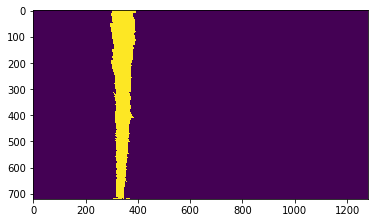

In [804]:
plt.imshow(cv2.bitwise_and(warpedbin,l_points))

In [805]:
l_maskand = cv2.bitwise_and(warpedbin,l_points)
lyfit = np.where(l_maskand[:-20,:] ==1)[0]
lxfit = np.where(l_maskand[:-20,:] ==1)[1]

r_maskand = cv2.bitwise_and(warpedbin,r_points)
ryfit = np.where(r_maskand[:-20,:] ==1)[0]
rxfit = np.where(r_maskand[:-20,:] ==1)[1]

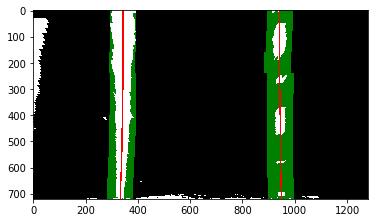

In [806]:
left_line = np.poly1d(np.polyfit(lyfit,lxfit,2))
right_line = np.poly1d(np.polyfit(ryfit,rxfit,2))
        
left_linepts = []
right_linepts = []

ploty = list(range(np.shape(l_maskand)[0]))

for ty in ploty:
    tx = left_line(ty)
    left_linepts.append([tx,ty])
    
    tx = right_line(ty)
    right_linepts.append([tx,ty])

l_out = cv2.polylines(output, [np.int32(left_linepts)], False, [255,0,0],4)
r_out = cv2.polylines(l_out, [np.int32(right_linepts)], False, [255,0,0],4)    
plt.imshow(r_out)

In [807]:
# Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

y_eval = np.max(list(range(0,np.shape(l_maskand[:-20,:])[0],5)))
# Fit new polynomials to x,y in world space
left_fit_cr = np.polyfit(lyfit*ym_per_pix, lxfit*xm_per_pix, 2)
right_fit_cr = np.polyfit(ryfit*ym_per_pix, rxfit*xm_per_pix, 2)
# Calculate the new radii of curvature
left_curverad = ((1 + (2*left_fit_cr[0]*y_eval*ym_per_pix + left_fit_cr[1])**2)**1.5) / np.absolute(2*left_fit_cr[0])
right_curverad = ((1 + (2*right_fit_cr[0]*y_eval*ym_per_pix + right_fit_cr[1])**2)**1.5) / np.absolute(2*right_fit_cr[0])
# Now our radius of curvature is in meters
print(left_curverad, 'm', right_curverad, 'm')
# Example values: 632.1 m    626.2 m

5423.13389034 m 15252.5408681 m


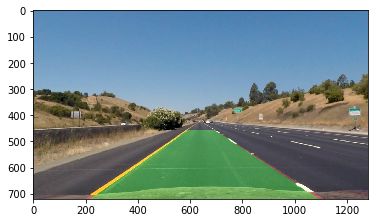

In [808]:
# Create an image to draw the lines on
warp_zero = np.zeros_like(warpedbin).astype(np.uint8)
color_warp = np.dstack((warp_zero, warp_zero, warp_zero))
undistrgb = cv2.cvtColor(undistort(test_img_straight1,mtx,dist),cv2.COLOR_BGR2RGB)

lx = np.int32(left_linepts)[:,0]
ly = np.int32(left_linepts)[:,1]

rx = np.int32(right_linepts)[:,0]
ry = np.int32(right_linepts)[:,1]

# Recast the x and y points into usable format for cv2.fillPoly()
pts_left = np.array([np.transpose(np.vstack([lx, ly]))])
pts_right = np.array([np.flipud(np.transpose(np.vstack([rx, ry])))])
pts = np.hstack((pts_left, pts_right))

# Draw the lane onto the warped blank image
cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
comb = cv2.polylines(color_warp, [np.int32(pts_left)], False, [255,0,0],10)
comb = cv2.polylines(comb, [np.int32(pts_right)], False, [255,0,0],10)  

# Warp the blank back to original image space using inverse perspective matrix (Minv)
newwarp = cv2.warpPerspective(comb, Minv, (warpedbin.shape[1], warpedbin.shape[0])) 

# Combine the result with the original image
result = cv2.addWeighted(undistrgb, 1, newwarp, 0.3, 0)
plt.imshow(result)

In [142]:
class Line():
    def __init__(self):
        #The first time line is checked it is the first frame, should be set to False afterwards
        self.first_frame = True
        
        # was the line detected in the last iteration?
        self.detected = False 
        
        # x values of the last n fits of the line
        self.recent_xfitted = [] 
        
        #average x values of the fitted line over the last n iterations
        self.bestx = None     
        
        #polynomial coefficients averaged over the last n iterations
        self.best_fit = None  
        
        #radius of curvature of the line in some units
        self.radius_of_curvature = None 
        
        #distance in meters of vehicle center from the line
        self.line_base_pos = None 
        
        #x values for detected line pixels
        self.allx = None  
        
        #y values for detected line pixels
        self.ally = None
        
        self.fit_coeff_hist = []
        
        #last line points fitted
        self.line_pts = None
        
    #add and update fit coeff
    def append_coeff(self,fit_coeff,maxdept=10):
        if len(self.fit_coeff_hist) < 10:
            self.fit_coeff_hist.append(fit_coeff)
        else:
            self.fit_coeff_hist[1:].append(fit_coeff)
            
        fit_coeff_np = np.array(self.fit_coeff_hist)
        self.best_fit = np.average(fit_coeff_np,axis=0)

In [143]:
# pipline for lane detection

#variable for pipline
#1. pickle camera calibration if loading 
campkl = pickle.load(open("camera_calibration.p", "rb"))
objpts = campkl['objpts']
imgpts = campkl['imgpts']
mtx = campkl['mtx']
dist = campkl['dist']

#2. hsv_line variables : s channel, v channel, x sobel thresh
'''
# for ideal images
sthresh=[60,255]
vthresh=[140,255]
xthresh=[30,190]
'''

# for harder images
sthresh=[190,255]
vthresh=[230,255]
xthresh=[30,190]

#--------------------------------------------------------------------------
#3. source - > destination mapping for prespective transform
#left line       
src0 = [581,457] 
src1 = [190,719] #bottom left

#right line
src2 = [1118,719] #bottom right #1118
src3 = [700,457] #700

src = np.float32([src0,src1,src2,src3])

#left line
dst0 = [320,0] 
dst1 = [320,719] #bottom left

#right line
dst2 = [960,719] #bottom right
dst3 = [960,0]

dst = np.float32([dst0,dst1,dst2,dst3])
#--------------------------------------------------------------------------

#5. window settings
window_width = 200 
window_height = 80 # Break image into 9 vertical layers since image height is 720
margin = 20 # How much to slide left and right for searching

#7. Use masking to select pixel for poly fit
deg=2

#9. Define conversions in x and y from pixels space to meters
ym_per_pix = 30/720 # meters per pixel in y dimension
xm_per_pix = 3.7/700 # meters per pixel in x dimension

def centroid_hist_append(window_centroids_hist,centroids,maxdepth=10):
    if len(window_centroids_hist) < maxdepth:
        return window_centroids_hist.append(centroids)
    else:
        #pop oldest before appending
        return window_centroids_hist[1:].append(centroids)

In [150]:
#reset line class parameter for testing
left_line = Line()
right_line = Line()
window_centroids_hist=[]

In [148]:
def adv_lane_pipline(img,left_line,right_line,window_centroids_hist):
    # 1. Undistort camera image. bgr input
    undist = undistort(img,mtx,dist)
    
    # 2. Call hsv_line for binary selection
    hsv_bin = hsv_lines(undist,sthresh,vthresh,xthresh)
    
    # 3. Get warped and unwarped matrix
    M = cv2.getPerspectiveTransform(src, dst)
    Minv = cv2.getPerspectiveTransform(dst,src)
    
    # 4. Use warped image
    img_shape = (img.shape[1],img.shape[0])
    warpedbin = cv2.warpPerspective(hsv_bin, M, img_shape, flags=cv2.INTER_LINEAR)

    # 5. Use sliding window if first frame, set first frame to false when done
    if left_line.first_frame:
        #mask out left 200 pixel and right 100 pixel to make sure first frame is does not include road noise
        imgmsk = np.zeros_like(warpedbin)
        imgmsk[:,200:int(img_shape[0]-100)]=1
        warped_mask = cv2.bitwise_and(warpedbin,imgmsk)
        window_centroids = find_window_centroids(warped_mask, window_width, window_height, margin)
        left_line.first_frame = False
        right_line.first_frame = False
    else:
        window_centroids = updt_window_centroids(warpedbin,window_centroids_hist[-1],window_width, window_height)
    
    #if centroid have too many errors set this flag
    centroid_flag = len(np.where(window_centroids==-1)[0]) >3
    
    # 6. Fix window centroid based on other centroid found, could use weighted history of centroid to filter out spikes
    if len(np.where(window_centroids==-1)[0]) !=0:
        window_centroids = fix_centroids(warpedbin.shape[0],window_centroids,window_height,window_centroids_hist)
    
    if not(centroid_flag):
        window_centroids_hist = centroid_hist_append(window_centroids_hist,window_centroids)

    left_linepts = []
    right_linepts = []
    print(centroid_flag)
    if not(centroid_flag):
        # 7. Use masking to select pixel for poly fit
        # Points used to draw all the left and right windows
        l_points = np.zeros_like(warpedbin)
        r_points = np.zeros_like(warpedbin)

        # Go through each level and draw the windows 
        for level in range(0,len(window_centroids)):
            # Window_mask is a function to draw window areas
            l_mask = window_mask(window_width/2,window_height,warpedbin,window_centroids[level][0],level)
            r_mask = window_mask(window_width/2,window_height,warpedbin,window_centroids[level][1],level)
            # Add graphic points from window mask here to total pixels found 
            l_points[(l_points == 255) | ((l_mask == 1) ) ] = 255
            r_points[(r_points == 255) | ((r_mask == 1) ) ] = 255

        # 8. Apply polyfit to selected pixel for each line, update polyfit to line
        # Fit cuts off bottom 20 pixel to remove hood of car noise
        l_maskand = cv2.bitwise_and(warpedbin,l_points)
        l_maskand_idx = np.where(l_maskand[:-20,:] ==1)
        lyfit = l_maskand_idx[0]
        lxfit = l_maskand_idx[1]

        r_maskand = cv2.bitwise_and(warpedbin,r_points)
        r_maskand_idx = np.where(r_maskand[:-20,:] ==1)
        ryfit = r_maskand_idx[0]
        rxfit = r_maskand_idx[1]

        l_fit = np.polyfit(lyfit,lxfit,deg)
        r_fit = np.polyfit(ryfit,rxfit,deg)
        left_eqn = np.poly1d(l_fit)
        right_eqn = np.poly1d(r_fit)

        #line is plotted to reach car hood
        ploty = list(range(warpedbin.shape[0]))

        for ty in ploty:
            tx = left_eqn(ty)
            left_linepts.append([tx,ty])

            tx = right_eqn(ty)
            right_linepts.append([tx,ty])

        left_line.line_pts = left_linepts
        right_line.line_pts = right_linepts

        left_line.append_coeff(l_fit)
        right_line.append_coeff(r_fit)
        
        # Fit new polynomials to x,y in world space
        left_fit_cr = np.polyfit(lyfit*ym_per_pix, lxfit*xm_per_pix, deg)
        right_fit_cr = np.polyfit(ryfit*ym_per_pix, rxfit*xm_per_pix, deg)
    else:
        #There is not enough correct window so use average best fit
        left_fit_cr = left_line.best_fit
        right_fit_cr = right_line.best_fit
        
        left_eqn = np.poly1d(left_fit_cr)
        right_eqn = np.poly1d(right_fit_cr)

        #line is plotted to reach car hood
        ploty = list(range(warpedbin.shape[0]))

        for ty in ploty:
            tx = left_eqn(ty)
            left_linepts.append([tx,ty])

            tx = right_eqn(ty)
            right_linepts.append([tx,ty])
    
    # 9. Calculate line curvature, update line variables
    yval = img_shape[1]

    # Calculate the new radii of curvature
    left_curverad = ((1 + (2*left_fit_cr[0]*yval*ym_per_pix + left_fit_cr[1])**2)**1.5)\
                     / np.absolute(2*left_fit_cr[0])
    right_curverad = ((1 + (2*right_fit_cr[0]*yval*ym_per_pix + right_fit_cr[1])**2)**1.5)\
                     / np.absolute(2*right_fit_cr[0])
        
    left_line.radius_of_curvature = left_curverad
    right_line.radius_of_curvature = right_curverad
    
    # 10. Create warped lane representation, upward and apply to image
    warp_zero = np.zeros_like(warpedbin).astype(np.uint8)
    color_warp = np.dstack((warp_zero, warp_zero, warp_zero))

    lx = np.int32(left_linepts)[:,0]
    ly = np.int32(left_linepts)[:,1]

    rx = np.int32(right_linepts)[:,0]
    ry = np.int32(right_linepts)[:,1]

    # Recast the x and y points into usable format for cv2.fillPoly()
    pts_left = np.array([np.transpose(np.vstack([lx, ly]))])
    pts_right = np.array([np.flipud(np.transpose(np.vstack([rx, ry])))])
    pts = np.hstack((pts_left, pts_right))

    # Draw the lane onto the warped blank image
    cv2.fillPoly(color_warp, np.int_([pts]), (0,255, 0))
    comb = cv2.polylines(color_warp, [np.int32(pts_left)], False, [0,0,255],10)
    comb = cv2.polylines(comb, [np.int32(pts_right)], False, [0,0,255],10)  

    # Warp the blank back to original image space using inverse perspective matrix (Minv)
    newwarp = cv2.warpPerspective(comb, Minv, img_shape) 

    # Combine the result with the original image. bgr out
    result = cv2.addWeighted(undist, 1, newwarp, 0.3, 0)
    return result

In [970]:
test_pipline = adv_lane_pipline(test_img_straight1,left_line,right_line,window_centroids_hist)

C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in greater


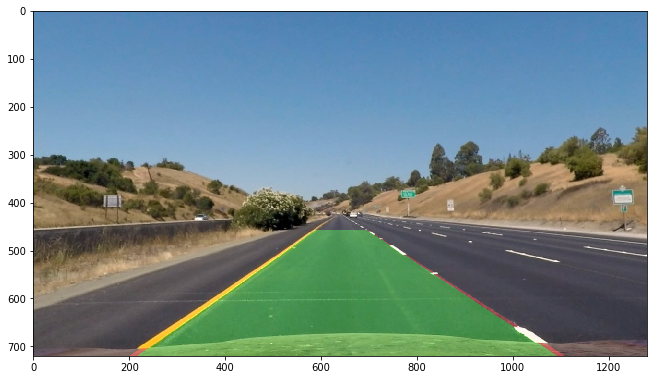

In [971]:
imshow1(test_pipline)

In [968]:
test_hist = updt_window_centroids(warpedbin,window_centroids_hist[-1],window_width, window_height)

C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in greater


In [139]:
img_test2 = cv2.imread('./test_images/test2.jpg')
img_test3 = cv2.imread('./test_images/test3.jpg')
img_test5 = cv2.imread('./test_images/test5.jpg')

In [151]:
imshow1(adv_lane_pipline(img_test2,left_line,right_line,window_centroids_hist))

True


C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:17: RuntimeWarning: invalid value encountered in true_divide
C:\Anaconda3\envs\carnd\lib\site-packages\ipykernel\__main__.py:20: RuntimeWarning: invalid value encountered in greater


TypeError: unsupported operand type(s) for +: 'int' and 'NoneType'

NameError: name 'centroid_flag' is not defined